In [1]:
import os
os.chdir('..')
from notebooks import config
import numpy as np 
import random
from utils.geotif_io import readTiff
from utils.imgShow import imgShow


In [2]:
ascend_name = list(sorted(os.listdir(config.dir_as)))
descend_name = list(sorted(os.listdir(config.dir_des)))
ascend_name[0]


's1as_scene01.tif'

In [3]:
ascend_list, descend_list = [], []

for i in range(len(ascend_name)):
    ascend_path = os.path.join(config.dir_as, ascend_name[i])
    descend_path = os.path.join(config.dir_des, descend_name[i])
    ascend, ascend_info = readTiff(ascend_path)
    descend,descend_info = readTiff(descend_path)
    ascend[np.where(ascend == -100)] = np.nan  
    descend[np.where(descend == -100)] = np.nan
    ascend_list.append(ascend)
    descend_list.append(descend)


### Obtain max and min value

In [9]:
ascend_max = [np.nanmax(ascend, axis=(0,1)) for ascend in ascend_list]  # max values of each image
ascend_max = np.nanmax(np.array(ascend_max), axis=0)     # max value of all images 
ascend_min = [np.nanmin(ascend, axis=(0,1)) for ascend in ascend_list]
ascend_min = np.nanmin(np.array(ascend_min), axis=0)
descend_max = [np.nanmax(descend, axis=(0,1)) for descend in descend_list]
descend_max = np.nanmax(np.array(descend_max), axis=0)
descend_min = [np.nanmin(descend, axis=(0,1)) for descend in descend_list]
descend_min = np.nanmin(np.array(descend_min), axis=0)
print('ascend_max(vv-vh):', ascend_max)
print('ascend_min:', ascend_min)
print('descend_max:', descend_max)
print('descend_min:', descend_min)


ascend_max(vv-vh): [25.98076439 10.22588158]
ascend_min: [-57.77743149 -70.36878967]
descend_max: [29.27596855 17.596035  ]
descend_min: [-58.97639845 -68.47470856]


### Obtain 2th percentile and 98th percentile values

In [19]:
# ### acending 
# ascend_max_per = [np.nanpercentile(ascend, 99, axis=(0,1)) for ascend in ascend_list]
# ascend_max_per = np.nanmean(np.array(ascend_max_per), axis=0)   # max value of all images 
# ascend_min_per = [np.nanpercentile(ascend, 1, axis=(0,1)) for ascend in ascend_list]
# ascend_min_per = np.nanmean(np.array(ascend_min_per), axis=0)   # max value of all images 
# ### descending
# descend_max_per = [np.nanpercentile(descend, 99, axis=(0,1)) for descend in descend_list]
# descend_max_per = np.nanmean(np.array(descend_max_per), axis=0)   # max value of all images 
# descend_min_per = [np.nanpercentile(descend, 1, axis=(0,1)) for descend in descend_list]
# descend_min_per = np.nanmean(np.array(descend_min_per), axis=0)   # max value of all images 
# ### print
# print('ascend_max_per(vv-vh):', ascend_max_per)
# print('ascend_min_per:', ascend_min_per)
# print('descend_max_per:', descend_max_per)
# print('descend_min_per:', descend_min_per)


ascend_max_per(vv-vh): [ -2.58706248 -12.21353776]
ascend_min_per: [-25.9568356 -38.1668846]
descend_max_per: [ -2.91176885 -12.6844714 ]
descend_min_per: [-29.07279498 -38.11437517]


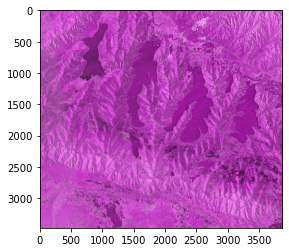

In [21]:
imgShow(ascend_list[2], color_bands=(0,1,0), clip_percent=1)

